In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
try:
  import alibi
except:
  !pip install alibi 
  import alibi
from alibi.datasets import fetch_imagenet
from alibi.explainers import AnchorImage

In [2]:
#Load pretrained model
model = InceptionV3(weights='imagenet')

In [3]:
image_shape = (299, 299, 3)

#The name of the image you want to predict
file = 'whitewolf.jpg'

#Transform image to feed it to the model
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

images = transform_img_fn([os.path.join('/content/',file)])

In [4]:
#predict the image
preds = model.predict(images)
#give the top 3 predictions
label = decode_predictions(preds, top=3)

print('Predictions: ')
print(label[0])

40960/35363 [==================================] - 0s 0us/step
predictions: 
[('n02114548', 'white_wolf', 0.89653903), ('n02114367', 'timber_wolf', 0.010256501), ('n02114855', 'coyote', 0.0018800222)]


In [5]:
#predict lambda function using the models predict function
predict_fn = lambda x: model.predict(x)

In [6]:
#Anchors image requires a segmenation function
segmentation_fn = 'slic'
kwargs = {'n_segments': 15, 'compactness': 20, 'sigma': .5}

#Create the explainer
explainer = AnchorImage(predict_fn, image_shape, segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs, images_background=None)

In [7]:
image1 = images[0]
#Explain image
explanation = explainer.explain(image1, threshold=.95, p_sample=.5, tau=0.25)

In [8]:
original_img=image.load_img(os.path.join('/content/',file), target_size=(299, 299))

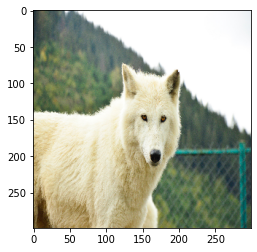

In [9]:
#Original image
plt.imshow(original_img)

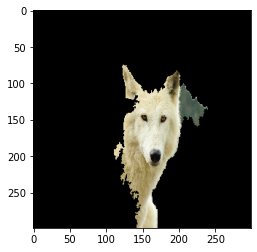

In [10]:
#Explanation for White wolf given by Anchors
plt.imshow(explanation.anchor);

(-0.5, 298.5, 298.5, -0.5)

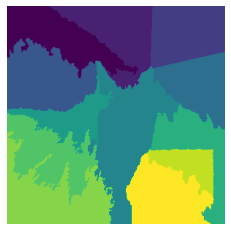

In [11]:
plt.imshow(explanation.segments)
plt.axis('off')